In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# import set_matplotlib_hangul
# %matplotlib inline

import tensorflow as tf
import os
import PIL
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 기본 경로
base_dir = '/content/drive/MyDrive/BME AI/CNN classification/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [9]:
# 훈련용 이미지 경로
train_normal_dir = os.path.join(train_dir, 'normal')
train_mbd_dir = os.path.join(train_dir, 'MBD')
print(train_mbd_dir, train_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data/train/MBD /content/drive/MyDrive/BME AI/CNN classification/data/train/normal


In [10]:
# 검증용 이미지 경로
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_mbd_dir = os.path.join(validation_dir, 'MBD')
print(validation_mbd_dir, validation_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data/validation/MBD /content/drive/MyDrive/BME AI/CNN classification/data/validation/normal


In [11]:
# 테스트용 이미지 경로
test_normal_dir = os.path.join(test_dir, 'normal')
test_mbd_dir = os.path.join(test_dir, 'MBD')
print(test_mbd_dir, test_normal_dir)

/content/drive/MyDrive/BME AI/CNN classification/data/test/MBD /content/drive/MyDrive/BME AI/CNN classification/data/test/normal


In [12]:
# 훈련용 이미지 파일 이름 조회
train_mbd_fnames = os.listdir(train_mbd_dir)
train_normal_fnames = os.listdir(train_normal_dir)
print(train_mbd_fnames)
print(train_normal_fnames)

['mbd4_resized.jpg', 'KakaoTalk_20230506_154318126_16_resized.jpg', 'mbd16_resized.jpg', 'KakaoTalk_20230506_154318126_08_resized.jpg', 'mbd83_resized.jpg', 'mbd53_resized.jpg', 'KakaoTalk_20230506_154318126_03_resized.jpg', 'mbd10_resized.jpg', 'mbd60_resized.jpg', 'KakaoTalk_20230506_154318126_11_resized.jpg', 'mbd15_resized.jpg', 'mbd20_resized.jpg', 'KakaoTalk_20230506_154318126_09_resized.jpg', 'KakaoTalk_20230506_154318126_17_resized.jpg', 'mbd17_resized.jpg', 'mbd24_resized.jpg', 'mbd21_resized.jpg', 'mbd38_resized.jpg', 'mbd51_resized.jpg', 'mbd18_resized.jpg', 'mbd66_resized.jpg', 'KakaoTalk_20230506_154318126_20_resized.jpg', 'mbd14_resized.jpg', 'mbd6_resized.jpg', 'mbd19_resized.jpg', 'KakaoTalk_20230506_154318126_13_resized.jpg', 'mbd7_resized.jpg', 'mbd62_resized.jpg', 'mbd82_resized.jpg', 'mbd80_resized.jpg', 'KakaoTalk_20230506_154318126_12_rotated.jpg', 'mbd78_resized.jpg', 'mbd31_resized.jpg', 'KakaoTalk_20230506_154318126_04_resized.jpg', 'KakaoTalk_20230506_15431812

In [13]:
print('Total training normal images :', len(os.listdir(train_normal_dir)))
print('Total training mbd images :', len(os.listdir(train_mbd_dir)))

print('Total validation normal images :', len(os.listdir(validation_normal_dir)))
print('Total validation mbd images :', len(os.listdir(validation_mbd_dir)))

print('Total test normal images :', len(os.listdir(test_normal_dir)))
print('Total test mbd images :', len(os.listdir(test_mbd_dir)))

Total training normal images : 282
Total training mbd images : 383
Total validation normal images : 38
Total validation mbd images : 40
Total test normal images : 25
Total test mbd images : 53


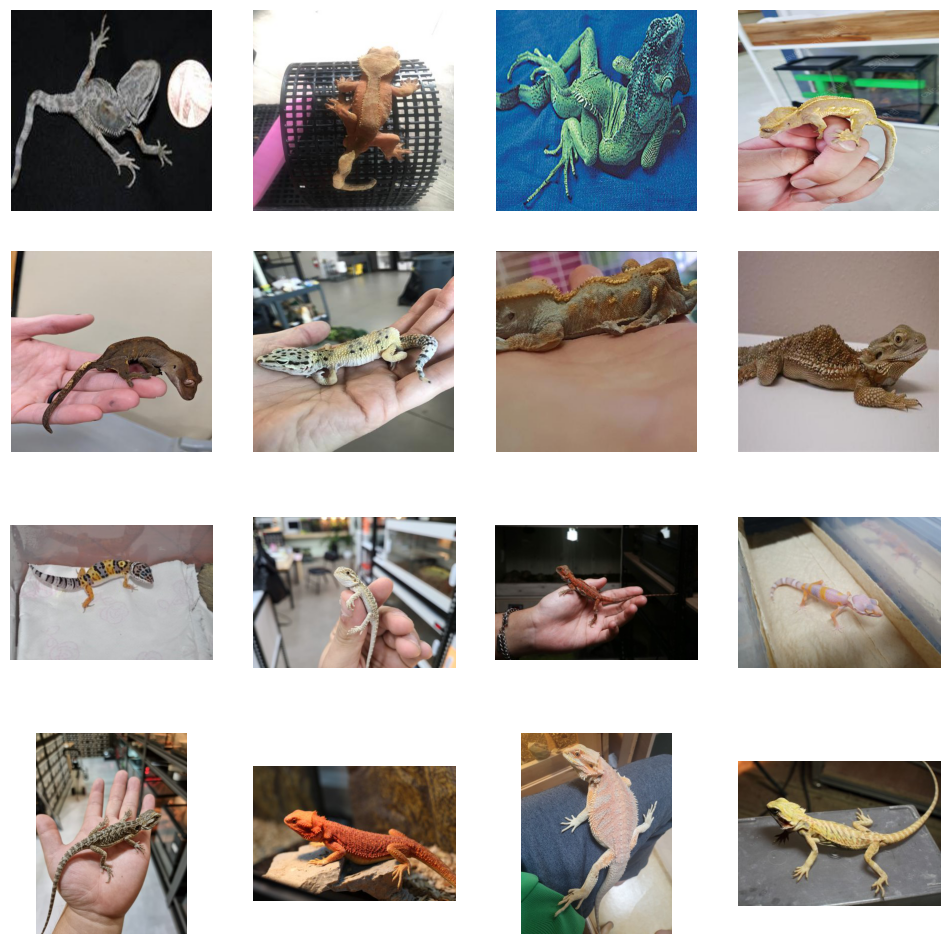

In [14]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_mbd_pix = [os.path.join(train_mbd_dir, fname) for fname in train_mbd_fnames[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(train_normal_dir, fname) for fname in train_normal_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_mbd_pix+next_normal_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기                                   
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  ) 
# validation 및 test 이미지는 augmentation을 적용하지 않는다;
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255) 

In [16]:
# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=16, # 한번에 변환된 이미지 16개씩 만들어라 라는 것
                                                    color_mode='grayscale', # 흑백 이미지 처리
                                                    class_mode='binary', 
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              batch_size=4, 
                                                              color_mode='grayscale',
                                                              class_mode='binary', 
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 한다.

Found 665 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [17]:
# class 확인
train_generator.class_indices

{'MBD': 0, 'normal': 1}

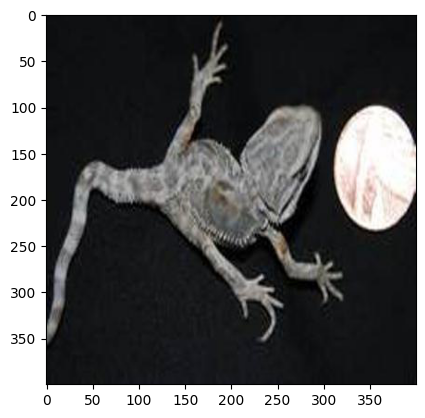

In [18]:
# 이미지 하나 불러오기
sample_img = mpimg.imread(next_mbd_pix[0])
plt.imshow(sample_img)
plt.show()

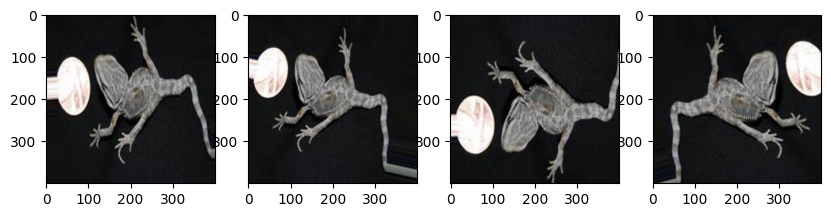

In [19]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [20]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [21]:
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [22]:
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validatino_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=4, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 데이터셋을 한 번 훈련하는 과정; epoch은 100 이상은 줘야한다
                              validation_steps=4, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

<ipython-input-22-7fe71a810a9b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
4/4 - 37s - loss: 0.6529 - accuracy: 0.6406 - val_loss: 0.6838 - val_accuracy: 0.5625 - 37s/epoch - 9s/step
Epoch 2/100
4/4 - 25s - loss: 0.6914 - accuracy: 0.5625 - val_loss: 0.6954 - val_accuracy: 0.5000 - 25s/epoch - 6s/step
Epoch 3/100
4/4 - 19s - loss: 0.6892 - accuracy: 0.6250 - val_loss: 0.7089 - val_accuracy: 0.4375 - 19s/epoch - 5s/step
Epoch 4/100
4/4 - 20s - loss: 0.6868 - accuracy: 0.5625 - val_loss: 0.6593 - val_accuracy: 0.6875 - 20s/epoch - 5s/step
Epoch 5/100
4/4 - 18s - loss: 0.6915 - accuracy: 0.5312 - val_loss: 0.6930 - val_accuracy: 0.5000 - 18s/epoch - 4s/step
Epoch 6/100
4/4 - 13s - loss: 0.6641 - accuracy: 0.6562 - val_loss: 0.6410 - val_accuracy: 0.7500 - 13s/epoch - 3s/step
Epoch 7/100
4/4 - 10s - loss: 0.6641 - accuracy: 0.6094 - val_loss: 0.7422 - val_accuracy: 0.5000 - 10s/epoch - 3s/step
Epoch 8/100
4/4 - 9s - loss: 0.6747 - accuracy: 0.6250 - val_loss: 0.6661 - val_accuracy: 0.6250 - 9s/epoch - 2s/step
Epoch 9/100
4/4 - 9s - loss: 0.6869 - accu

In [23]:
# 모델 성능 평가
model.evaluate(train_generator)


42/42 [==============================] - 4s 105ms/step - loss: 0.5769 - accuracy: 0.6767


[0.5769415497779846, 0.6766917109489441]

In [24]:
model.evaluate(validation_generator)

20/20 [==============================] - 1s 26ms/step - loss: 0.6956 - accuracy: 0.6282


[0.6955581903457642, 0.6282051205635071]

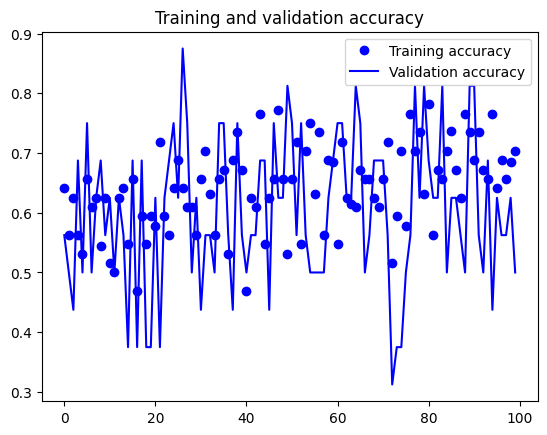

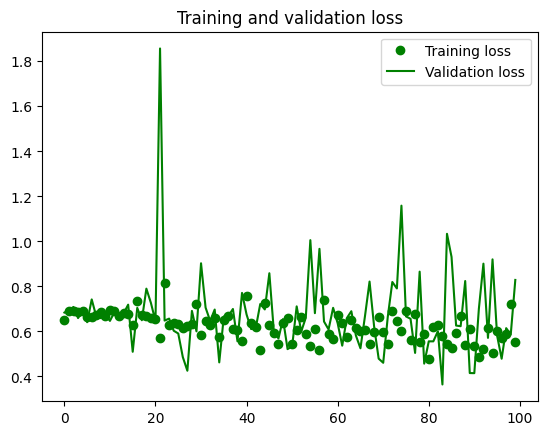

In [25]:
# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
# 이제 테스트 이미지 분류
import numpy as np
from tensorflow.keras.utils import load_img

# 테스트용 mbd 이미지 경로 설정
test_dir = '/content/drive/MyDrive/BME AI/CNN classification/data/test/'
test_mbd_dir = os.path.join(test_dir, 'MBD/')
test_mbd_filenames = os.listdir(test_mbd_dir)
test_mbd_filenames

# 테스트용 normal 이미지 경로 설정
test_dir = '/content/drive/MyDrive/BME AI/CNN classification/data/test/'
test_normal_dir = os.path.join(test_dir, 'normal/')
test_normal_filenames = os.listdir(test_normal_dir)
test_normal_filenames

# mbd, normal을 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_mn_filenames = {}
dic_mn_filenames['MBD'] = test_mbd_filenames
dic_mn_filenames['normal'] = test_normal_filenames


1/1 [==============================] - 0s 38ms/step


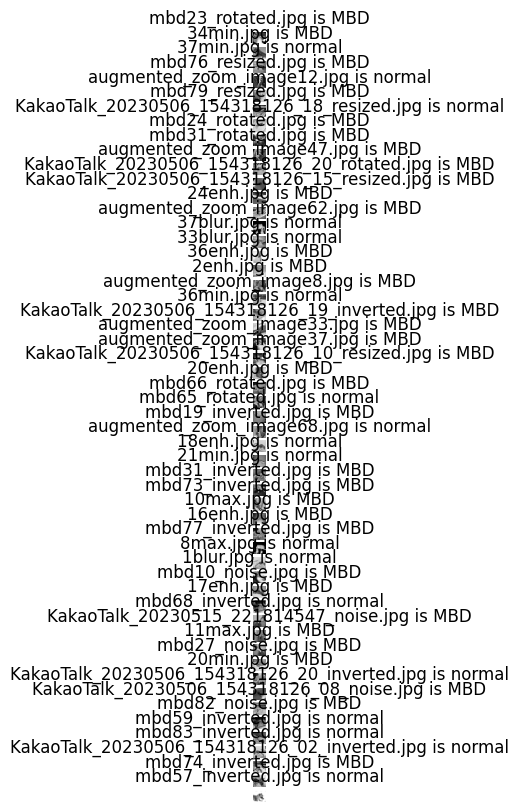

1/1 [==============================] - 0s 19ms/step


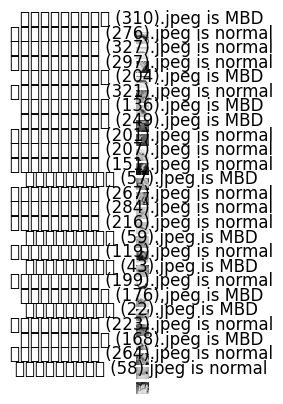

In [31]:

# MBD 분류 테스트
for mn, filenames in dic_mn_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 53, 1
    for i, fn in enumerate(filenames):
        path = test_dir + mn + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150, 150), interpolation='bilinear')        
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title(fn + " is MBD")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')

        else:
            plt.title(fn + " is normal")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();


In [32]:
# 모델 성능 평가
model.evaluate(test_generator)

20/20 [==============================] - 0s 19ms/step - loss: 0.5801 - accuracy: 0.7051


[0.5801227688789368, 0.7051281929016113]